# Exploratory data analysis of  the dataset

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the dataset
df_in = pd.read_excel('sciencepapers_with_userprofiles.xlsx')

In [3]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user              2294 non-null   int64         
 1   Area of interest  2294 non-null   object        
 2   Input             2294 non-null   object        
 3   title             2294 non-null   object        
 4   Rating            2286 non-null   float64       
 5   arxiv_id          2294 non-null   object        
 6   paper_Id          2294 non-null   object        
 7   created           2294 non-null   datetime64[ns]
 8   categories        2292 non-null   object        
 9   authors           2294 non-null   object        
 10  keywords          2294 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 197.3+ KB


In [4]:
df_in.head()

,user,Area of interest,Input,title,Rating,arxiv_id,paper_Id,created,categories,authors,keywords
0,1,Warehousing Web Data,Warehousing Web Data,Web data modeling for integration in data ware...,5.0,705.1457,7051457,2007-05-10,cs_DB,"Sami Miniaoui, J√©r√¥me Darmont, Omar Boussa√Ød","uml conceptual model, complex object represent..."
1,1,Warehousing Web Data,Warehousing Web Data,First-order Complete and Computationally Compl...,1.0,1005.0214,10050214,2007-05-10,cs_DB,"Floris Geerts, Sofie Haesevoets, Bart Kuijpers","spatio-temporal databases, define spatio-tempo..."
2,1,Warehousing Web Data,Warehousing Web Data,DWEB: A Data Warehouse Engineering Benchmark,3.0,705.1453,7051453,2007-05-10,cs_DB,"J√©r√¥me Darmont, Fadila Bentayeb, Omar Bous...","decision support query performance, data wareh..."
3,1,Warehousing Web Data,Warehousing Web Data,Warehousing Web Data,2.0,0704.3501,7043501,2007-04-26,cs_DB,"J√©r√¥me Darmont, Omar Boussa√Ød, Fadila Ben...","multiform input data, so-called multiform, fir..."
4,1,Warehousing Web Data,Warehousing Web Data,An MAS-Based ETL Approach for Complex Data,3.0,809.2686,8092686,2008-09-16,cs_DB,"Omar Boussa√Ød, Fadila Bentayeb, J√©r√¥me Da...","complex data integration, data integration pro..."


# Exploratory data analysis of the ratings column
It is important that we understand the data to be able to apply the right algorithms and analysis to it

In [5]:
cols_of_interest = ['user','paper_Id','Rating']
ratings = df_in[cols_of_interest]

In [6]:
ratings.head()

,user,paper_Id,Rating
0,1,7051457,5.0
1,1,10050214,1.0
2,1,7051453,3.0
3,1,7043501,2.0
4,1,8092686,3.0


# Sparsity
Data sparsity is a measure of how empty the data is. A high sparsity can sometimes be a problem when we want to apply certain machine learning algorithms. However, some algorithms can still handle a high sparsity. Understanding the sparsity percentage can help us anticipate what kind of algorithms we can apply.

for our understanding

reference source: https://www.mygreatlearning.com/blog/understanding-sparse-matrix/

In [8]:
n_uniq_users = ratings['user'].nunique()
n_uniq_papers = ratings['paper_Id'].nunique()

In [9]:
print('number of unique users in the dataset :',n_uniq_users)
print('number of unique papers in the dataset :',n_uniq_papers)

number of unique users in the dataset : 222
number of unique papers in the dataset : 597


In [10]:
sparsity = round((1.0 - len(ratings)/float(n_uniq_users*n_uniq_papers))*100, 4)

In [11]:
print('sparsity = ',sparsity)

sparsity =  98.2691


We have a very high sparsity owing to the limited number of use profiles at the moment. 

# Exploring the distribution of ratings column in the dataset.


In this section we will see the nature of the ratings column. We will explore how the ratings are on user basis, summary statisics of the rating and also how users rate the papers and if there is a pattern in the way users rate.

In [18]:
paperId_rating = pd.DataFrame(ratings.groupby('paper_Id')['Rating'].mean())

In [19]:
paperId_rating.head()

,Rating
paper_Id,
4010,4.0
5003,3.0
11024,4.0
11041,2.0
91136,2.0


In [20]:
paperId_rating['grpby_ratings'] = ratings.groupby('paper_Id')['Rating'].count()

In [21]:
paperId_rating.head()

,Rating,grpby_ratings
paper_Id,,
4010,4.0,2
5003,3.0,4
11024,4.0,2
11041,2.0,2
91136,2.0,2


# Rating frequency

In [22]:
paperId_rating['grpby_ratings'].describe()

count    597.000000
mean       3.829146
std        3.032977
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       28.000000
Name: grpby_ratings, dtype: float64

<AxesSubplot:>

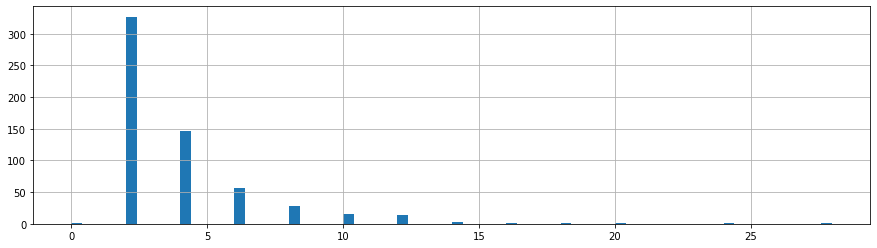

In [23]:
plt.figure(figsize=(15,4))
paperId_rating['grpby_ratings'].hist(bins=70)

<AxesSubplot:>

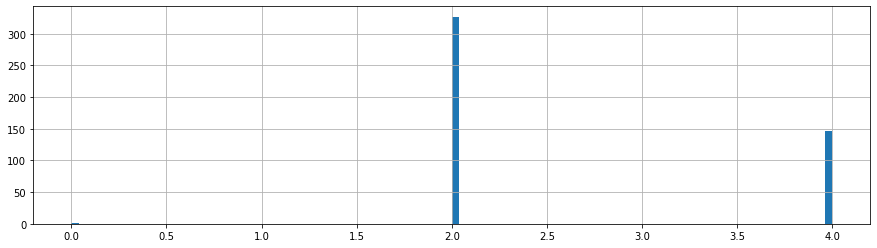

In [25]:
plt.figure(figsize=(15,4))
paperId_rating[paperId_rating['grpby_ratings'] < 5]['grpby_ratings'].hist(bins=100)

In [26]:
#how many papers have less than 5 ratings?
(paperId_rating['grpby_ratings'] < 5).sum()

475

<AxesSubplot:>

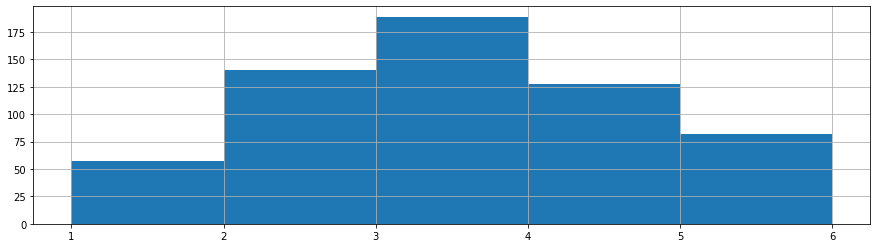

In [27]:
plt.figure(figsize=(15,4))
paperId_rating['Rating'].hist(bins=5)

# Interaction between ratings and rating frequency

how rating frequencies are distributed for each rating?


/Users/ushapraveen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


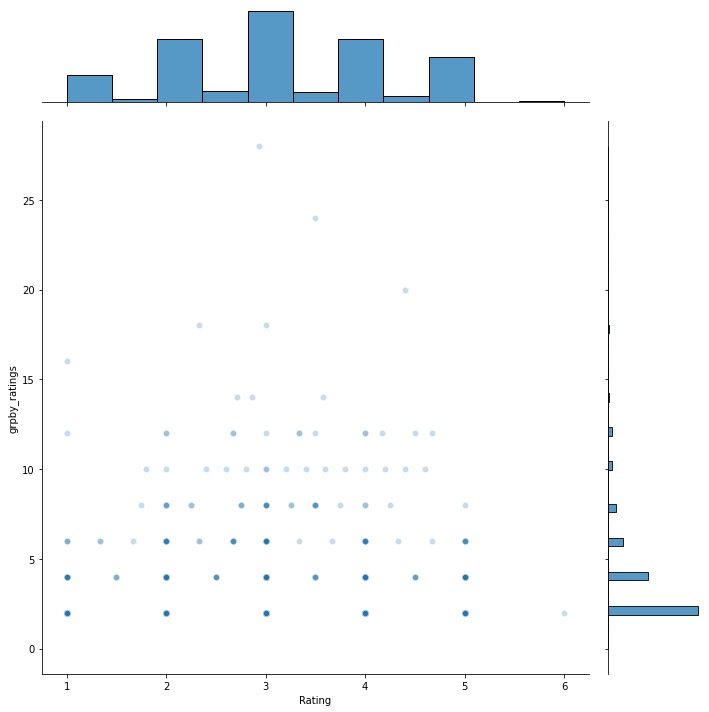

In [28]:
sns.jointplot(x='Rating',y='grpby_ratings',data=paperId_rating,alpha=0.25, size=10)

# Summarize by user

In [30]:
user_rating = pd.DataFrame(ratings.groupby('user')['Rating'].count())

In [31]:
user_rating.columns = ['rating_frequency']

In [32]:
user_rating['rating_mean'] = ratings.groupby('user')['Rating'].mean()

In [33]:
user_rating.head()

,rating_frequency,rating_mean
user,,
1,20,3.1
2,10,3.2
3,10,3.2
4,10,3.6
5,10,4.6


In [34]:
user_rating.describe()

,rating_frequency,rating_mean
count,222.000000,222.000000
mean,10.297297,3.087867
std,2.650346,0.677382
min,3.000000,1.800000
25%,10.000000,2.587500
50%,10.000000,3.075000
75%,10.000000,3.600000
max,28.000000,4.600000


<AxesSubplot:>

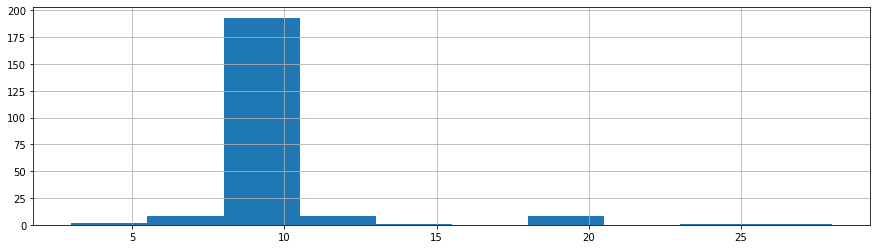

In [35]:
plt.figure(figsize=(15,4))
user_rating['rating_frequency'].hist(bins=10)

# Rating distribution

<AxesSubplot:>

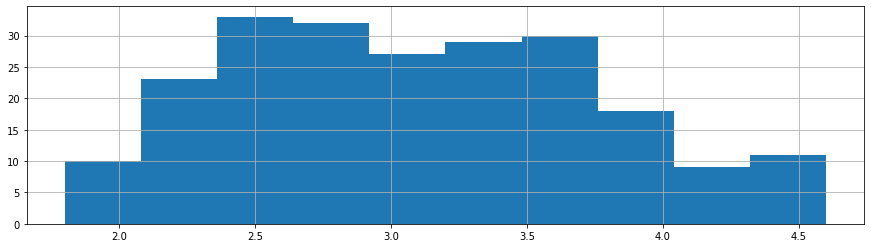

In [36]:
plt.figure(figsize=(15,4))
user_rating['rating_mean'].hist(bins=10)

/Users/ushapraveen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


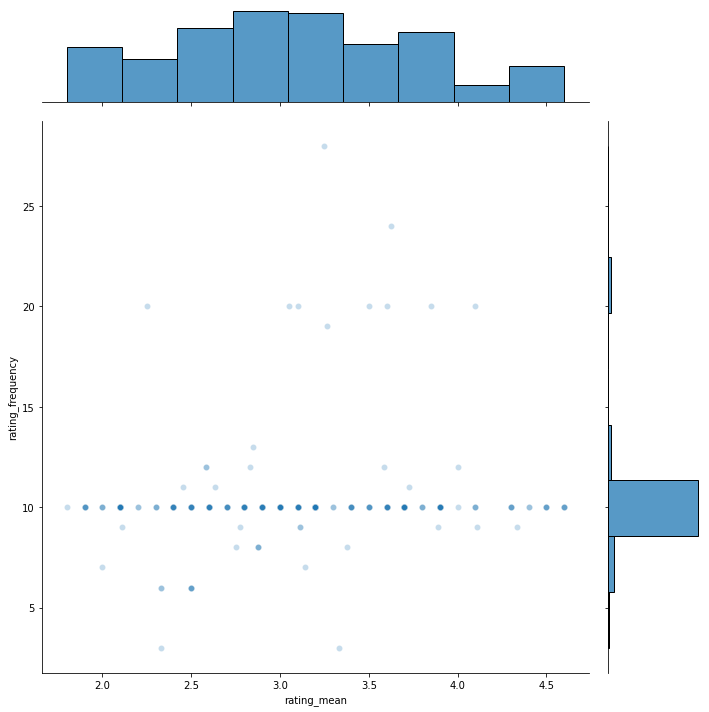

In [38]:
#Interaction between ratings and rating frequency
sns.jointplot(x='rating_mean',y='rating_frequency',data=user_rating,alpha=0.25, size=10)